## Machine Learning Foundation & Techniques: Assignment 2

### Noisy Targets
---

#### 1. Consider the bin model for a hypothesis $h$ that makes an error with probability $\mu$ in approximating a deterministic target function $f$ (both $h$ and $f$ outputs $\{-1, +1\}$). If we use the same $h$ to approximate a noisy version of $f$ given by

$$P(x, y) = P(x)P(y|x)$$

$$
P(y|x)= \begin{cases}
    \lambda & \text{y = f(x)}\\
    1-\lambda & \text{otherwise}
\end{cases}
$$

#### What is the probability of error that $h$ makes in approximating the noisy target $y$ ? Please provide explanation of your answer.

The original error is $\mu$, after giving the noise by flipping the label (1 $\rightarrow$ -1 and -1 $\rightarrow$ 1), the new error will be the original error $\mu$ times the probability to stay at the same condition (probability to still makes error) and the error from the correct part, $1 - \mu$ that is now incorrect; that is, the correct part $1 - \mu$ times the probability $1 - \lambda$ to be incorrect.

$$
E_{noise} = \mu \cdot \lambda + (1-\mu) \cdot (1-\lambda)
$$

#### 2. Following Question 1, with what value of will the performance of $h$ be independent of $\mu$ ? Please provide explanation of your answer.

After rearranging the above error function, we can derive the following form.

$$
E_{noise} = \mu \cdot \lambda + (1-\mu) \cdot (1-\lambda) \\
= \mu \cdot (2 \lambda -1) + 1 - \lambda
$$

When $\lambda = \frac{1}{2}$, we can see that the first part becomes $0$, making $h$ independent of $\mu$. 

### Generalization Error
---

Questions 3-5 are about *generalization error*, and getting the feel of the bounds numerically. Please use the simple upper bound $N^{d_{vc}}$ on the growth function $m_{H}(N)$, assuming that $N \le 2$ and $d_{vc} \le 2$.

#### 3. For an $H$ with $d_{vc} = 10$, if you want 95% confidence that your generalization error is at most 0.05, what is the sample size that the VC generalization bound predicts? Please provide calculating steps of your answer, and round your answer to the closest thousand (that is, your answer should be something like 845000).

Vapnik-Chervonenkis (VC) bound,

$$
P[|E_{in}(h) - E_{out}(h)| > \epsilon] \le 4m_{H}(2N) \cdot exp(-\frac{1}{8} \epsilon^{2}N)
$$

By plugging in $d_{vc} = 10 $, $\epsilon = 0.05$, and $m_{H}(N) = N^{d_{vc}}$, we get

$$
P[|E_{in}(h) - E_{out}(h)| > 0.05] \le  4 \cdot (2N)^{10} \cdot exp(-\frac{N}{3200}) \le \frac{1}{20}
$$

After $\log$ and rearranging, we get

$$
0 \le \frac{N}{3200} - 10 \log(N) - \log(80 \cdot 1024)
$$

We can then compute $N$ by iterating $N$ until the right hand side $ \ge 0$.

##### Compute N numerically

In [1]:
import math

N = 1
result = -1
N_list = []
result_list = []

while result < 0:
    y = (N / 3200) - 10 * math.log(N) - math.log(80 * 1024)
    result = y
    
    N_list.append(N)
    result_list.append(y)
    N += 1
    
print('The sample size that the VC generalization bound predicts is %d' %N)

The sample size that the VC generalization bound predicts is 452958


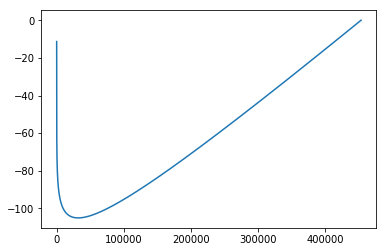

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(N_list, result_list)

#### 4. There are a number of bounds on the generalization error $\epsilon$ , all holding with probability at least $1 - \delta$. Fix $d_{vc} = 50$ and $\delta = 0.05$ and plot these bounds as a function of $N$. Use any numerical method to calculate the (most) generalization error by the bound. Which bound is the tightest (smallest) for very large $N$, say $N = 10,000$ ? What is the generalization error calculated by the tightest bound? Note that Devroye and Parrondo & Van den Broek are implicit bounds in $\epsilon$.

### One-Dimensional Decision Stump
---

In class, we taught about the learning model of **“positive and negative rays”** (which is simply one-dimensional perceptron) for one-dimensional data. The model contains hypotheses of the form: 

$$ h_{s, \theta} (x) = s \cdot sign(x - \theta). $$

The model is frequently named the **“decision stump”** model and is one of the simplest learning models. As shown in class, for one-dimensional data, the VC dimension of the decision stump model is 2.

In fact, the decision stump model is one of the few models that we could easily minimize $E_{in}$ for binary classification effciently by enumerating all possible thresholds. In particular, for $N$ examples, there are at most $2N$ dichotomies (see page 22 of class05 slides), and thus at most $2N$ different $E_{in}$ values. We can then easily choose the dichotomy that leads to the lowest $E_{in}$, where ties can be broken by randomly choosing among the lowest-$E_{in}$ ones. The chosen dichotomy stands for a combination of some **'spot'** (range of $\theta$) and $s$, and commonly the median of the range is chosen as the $\theta$ that realizes the dichotomy.

In this problem, you are asked to implement such an algorithm and run your program on an artificial data set. First of all, start by generating a one-dimensional data by the procedure below:

- Generate $x$ by a uniform distribution in $[-1, 1]$.
- Generate $y$ by $\tilde{s}(x) + noise$ where $\tilde{s}(x) = sign(x)$ and the noise flips the result with 20% probability.

#### 16.  For any decision stump $h_{s,\theta}$ with $\theta \in [-1, 1]$, express $E_{out}(h_{s,\theta})$ as a function of $\theta$ and $s$. Please provide your derivation steps.

##### Error function $E_{out}(h_{s,\theta})$

When $\theta > 0$, then we can compute $E_{out}$ as follow,

$$
E_{out} = \frac{(1-\theta)}{2} [(1 - s) \cdot 0.8 + (1 + s) \cdot 0.2]/2  \\
+ \frac{\theta}{2} [(1 + s) \cdot 0.8 + (1 -s) \cdot 0.2]/2 \\
+ \frac{1}{2} [(1 + s) \cdot 0.8 + (1 -s) \cdot 0.2] /2
$$

When $\theta <0 $, then we can compute $E_{out}$ as follow,

$$
E_{out} = \frac{1}{2} [(1 + s) \cdot 0.8 + (1 -s) \cdot 0.2] /2 \\
+ \frac{\theta}{2} [(1 + s) \cdot 0.8 + (1 -s) \cdot 0.2]/2 \\
+ \frac{(\theta-1)}{2} [(1 - s) \cdot 0.8 + (1 + s) \cdot 0.2]/2 
$$

After rearrangment, we can get the final result,

$$
E_{out} = 0.5 + 0.3 \cdot s \cdot (|\theta| - 1)
$$

#### 17. (`*`) Generate a data set of size 20 by the procedure above and run the one-dimensional decision stump algorithm on the data set. Record $E_{in}$ and compute $E_{out}$ with the formula above. Repeat the experiment (including data generation, running the decision stump algorithm, and computing $E_{in}$ and $E_{out}$) 5,000 times. What is the average $E_{in}$? Plot a histogram for your $E_{in}$ distribution.

#### 18. (`*`) Continuing from the previous question, what is the average $E_{out}$? Plot a histogram for your $E_{out}$ distribution.

##### Generate dataset

In [3]:
import numpy as np
import random

def generate_data(size, low, high, prob):
    """ Generate X by a uniform distribution in the specified range.
        Generate Y with a given probaility of noise.
    """
    
    X = np.random.uniform(low, high, size)
    Y = np.sign(X)
    
    # noise: flip the result with specified prob
    for i in range(len(Y)):
        if random.random() < prob:
            Y[i] *= -1
            
    return X, Y

##### Build model

In [4]:
def decision_stump(X, Y):
    """Decision stump model for one-dimensional data. Return error, theta (threshold) and s."""
    
    err_1 = []            # when s = 1
    err_2 = []            # when s = -1
    X_sort = sorted(X)
    
    # use median as the threshold
    thresholds = [(X_sort[i] + X_sort[i + 1]) / 2 for i in range(len(X) - 1)]
    # use max as the extreme case (classify all data to one side)
    thresholds.append(X_sort[-1])
    
    # iterate over all thresholds and compute error
    for threshold in thresholds:
        theta = threshold
        Y_pred = np.sign(X - theta)
        err_1.append(np.sum(Y_pred != Y))      # when s = 1
        err_2.append(np.sum(-Y_pred != Y))     # when s = -1
    
    # determine the best theta and s
    if np.min(err_1) < np.min(err_2):
        avg_err = np.min(err_1) / len(X) 
        final_theta = thresholds[np.argmin(err_1)]
        s = 1
    else:
        avg_err = np.min(err_2) / len(X) 
        final_theta = thresholds[np.argmin(err_2)]
        s = -1
        
    return avg_err, final_theta, s
    

##### Compute $E_{out}$

In [5]:
def err_out_function(s, theta):
    
    return 0.5 + 0.3 * s * (abs(theta) - 1)

##### Experiment

In [6]:
size = 20; low = -1; high = 1; prob = 0.2; experiment = 5000

total_err_in = []
total_err_out = []
for i in range(experiment):
    X, Y = generate_data(size, low, high, prob)
    
    err_in, theta, s = decision_stump(X, Y)
    total_err_in.append(err_in)
    
    err_out = err_out_function(s, theta)
    total_err_out.append(err_out)
    
    
avg_err_in = np.mean(total_err_in)
avg_err_out = np.mean(total_err_out)
print('In-sample error: %f' %avg_err_in)
print('Out-of-sample error: %f' %avg_err_out)

In-sample error: 0.169750
Out-of-sample error: 0.258366


##### Plot error

1

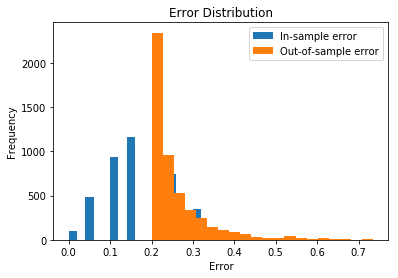

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(total_err_in, bins= 20, label= 'In-sample error')
plt.hist(total_err_out, bins= 20, label= 'Out-of-sample error')
plt.legend()
plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
1

### Multi-dimensional Decision Stump
---

Decision stumps can also work for multi-dimensional data. In particular, each decision stump now deals with a specific dimension $i$, as shown below. 

$$ h_{s, i, \theta} (x) = s \cdot sign(x_i - \theta). $$

Implement the following decision stump algorithm for multi-dimensional data:
    
1. for each dimension $i = 1, 2, ..., d$, find the best decision stump $h_{s, i, \theta}$ using the one-dimensional decision stump algorithm that you have just implemented.
2. return the *“best of best”* decision stump in terms of $E_{in}$. If there is a tie, please randomly choose among the lowest-$E_{in}$ ones.

The training data $D_{train}$ is available at: http://www.csie.ntu.edu.tw/~htlin/course/ml14fall/hw2/hw2_train.dat

The testing data $D_{test}$ is available at: http://www.csie.ntu.edu.tw/~htlin/course/ml14fall/hw2/hw2_test.dat

#### 19. (`*`) Run the algorithm on the $D_{train}$. What is the optimal decision stump returned by your program? What is the $E_{in}$ of the optimal decision stump?

#### 20 (`*`) Use the returned decision stump to predict the label of each example within the $D_{test}$. Report an estimate of $E_{out}$ by $E_{test}$.

##### Read dataset

In [8]:
import pandas as pd

def read_data(file):
    data = pd.read_csv(file, sep = ' ', header = None)
    data = data.drop(0, axis = 1)  # drop the first empty column
    return data

##### Build Model

In [9]:
def multi_decision_stump(data):
    
    Y = np.array(data[10])
    err_column = []
    theta_column = []
    s_column = []
    
    for column in data.loc[:, :9]:
        X = np.array(data[column])
        err, theta, s = decision_stump(X, Y)
        
        err_column.append(err)
        theta_column.append(theta)
        s_column.append(s)
    
    best_err = np.min(err_column)
    best_theta = theta_column[np.argmin(err_column)]
    best_s = s_column[np.argmin(err_column)]
    best_column = np.argmin(err_column) + 1
    
    return best_err, best_theta, best_s, best_column
    

##### Compute $E_{out}$

In [10]:
def test_model(X, Y, theta, s):

    Y_pred = s * np.sign(X - theta)
    err = np.sum(Y_pred != Y)
    avg_err = err / len(Y)
    
    return avg_err
    

##### Experiment

In [11]:
train_file = 'data/hw2_train.dat.txt'
data_train = read_data(train_file)
err, theta, s, column = multi_decision_stump(data_train)

print('err_in : ', err)
print('theta  : ', theta)
print('s      : ', s)
print('column : ', column)

err_in :  0.25
theta  :  1.6175
s      :  -1
column :  4


In [12]:
test_file = 'data/hw2_test.dat.txt'
data_test = read_data(test_file)

Y = data_test[10].values
X = data_test[column].values
err_out = test_model(X, Y, theta, s)
print('err_out: ', err_out)

err_out:  0.355
